In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor 
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.metrics import mean_absolute_error
import pickle
%matplotlib inline

In [4]:
df = pd.read_csv('1.csv')

In [5]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'PRN', 'Epoch_Time_of_Clock',
       'SV_Clock_Bias', 'SV_Clock_Drift', 'SV_Clock_Drift_Rate', 'IODE', 'Crs',
       'Del_n', 'M0', 'Cuc', 'e', 'Cus', 'sqrt_A', 'Toe', 'Cic', 'OMEGA',
       'Cis', 'i0', 'Crc', 'omega', 'OMEGA_dot', 'I_dot', 'Codes', 'GPS_week',
       'L2_P_Data_flag', 'SV_accuracy', 'SV_health', 'Tgd', 'IODC', 'T_Tx',
       'Fit_Interval'],
      dtype='object')

In [6]:
df1 = pd.to_datetime(df['Epoch_Time_of_Clock'])
df['Epoch_Time_of_Clock']=df1
df.index = pd.to_datetime(df['Epoch_Time_of_Clock'],format='%Y-%m-%d %H:%M:%S')

In [7]:
df1 = pd.concat([df['sqrt_A'] , df['e'],df['i0'],df['omega'],df['OMEGA'],df['Del_n'],df['M0']],axis=1)
df1.head()

,sqrt_A,e,i0,omega,OMEGA,Del_n,M0
Epoch_Time_of_Clock,,,,,,,
2017-11-01 14:00:00,5153.670197,0.007094,0.968712,0.632720,1.009373,4.874846e-09,2.755637
2017-11-01 16:00:00,5153.669188,0.007095,0.968713,0.632739,1.009313,4.916991e-09,-2.477381
2017-11-01 18:00:00,5153.669888,0.007095,0.968716,0.632683,1.009252,4.874846e-09,-1.427139
2017-11-01 20:00:00,5153.670305,0.007095,0.968717,0.632654,1.009192,4.875203e-09,-0.376924
2017-11-01 22:00:00,5153.673241,0.007096,0.968719,0.632704,1.009131,4.753055e-09,0.673209


In [8]:
df1.dtypes #Keplerian parameters

sqrt_A    float64
e         float64
i0        float64
omega     float64
OMEGA     float64
Del_n     float64
M0        float64
dtype: object

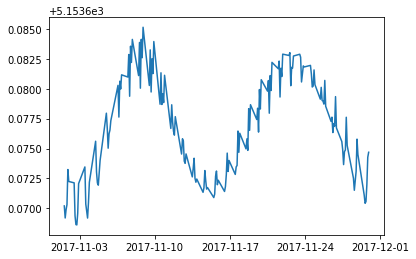

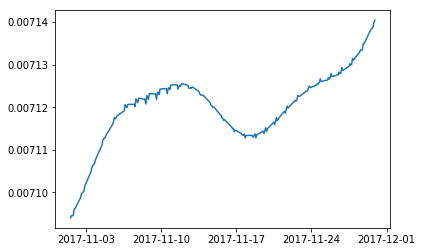

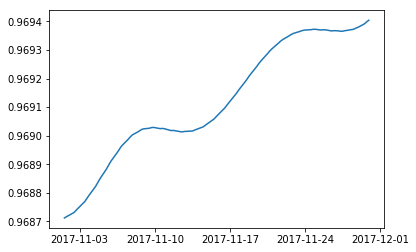

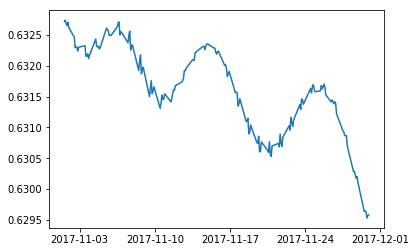

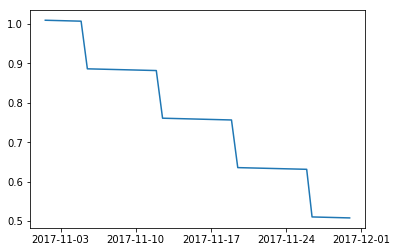

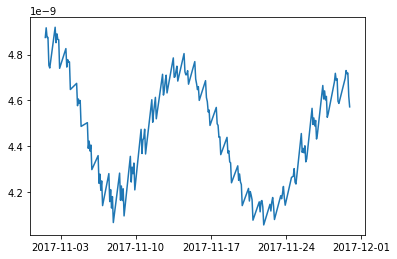

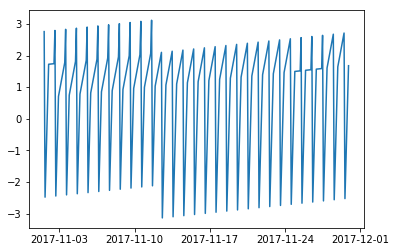

In [9]:
for i in range(0,7):
    x = df1.index
    y = df1.iloc[:,i]
    plt.plot(x,y)
    plt.show()

In [13]:
for j in range(0,7):
    s = df1.iloc[:,j]
    df3 = pd.DataFrame()

    for i in range(1, 6):
        df3["lag_{}".format(i)] = df1.iloc[:,j].shift(i)
    
    train = df3.iloc[0:137]
    test = df3.iloc[137:177]
    
    train=train.dropna(how="any")
    
    m = df1.iloc[:,j]
    ytrain=m.iloc[5:137]
    ytest =m.iloc[137:]

    xgb = XGBRegressor(max_depth=6)
    xgb.fit(train, ytrain)
    filename = 'finalized_model.sav'
    pickle.dump(xgb, open(filename, 'wb'))
    
""" preds = xgb.predict(test)
   
    print('\nMean Square error" ', mean_absolute_error(ytest,preds))
    
    pred = pd.DataFrame(data=preds, index=ytest.index)
    
    plt.plot(df1.index,df1.iloc[:,j],color="red")
    #plt.plot(ytrain.index,ytrain,color="green")
    plt.plot(pred,color="blue")
    plt.show()"""

' preds = xgb.predict(test)\n   \n    print(\'\nMean Square error" \', mean_absolute_error(ytest,preds))\n    \n    pred = pd.DataFrame(data=preds, index=ytest.index)\n    \n    plt.plot(df1.index,df1.iloc[:,j],color="red")\n    #plt.plot(ytrain.index,ytrain,color="green")\n    plt.plot(pred,color="blue")\n    plt.show()'


Mean Square error"  0.0013446424622316044


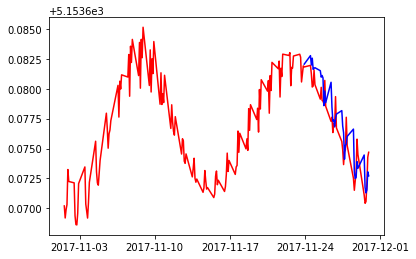


Mean Square error"  1.236733558885616e-05


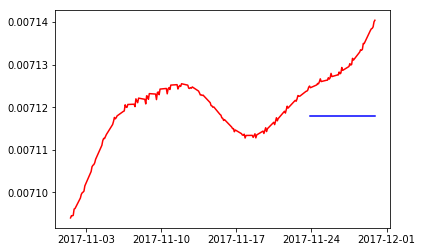


Mean Square error"  0.00030755600941725914


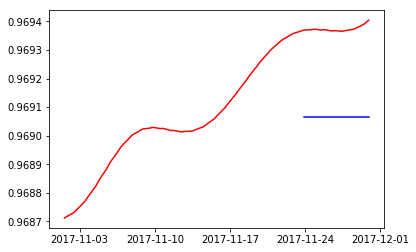


Mean Square error"  0.0003484368081397543


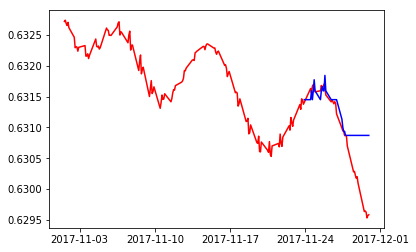


Mean Square error"  0.08074788334780207


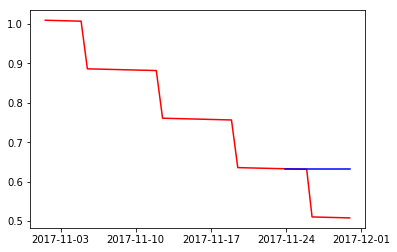


Mean Square error"  1.505853309247156e-10


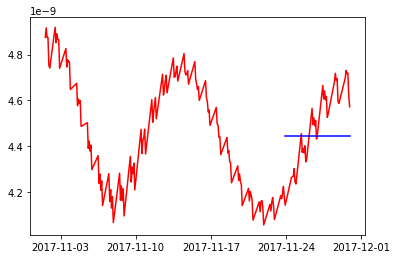


Mean Square error"  0.19133291255432994


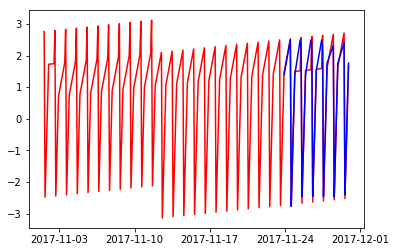

In [37]:
#XGB
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
for j in range(0,7):
    s = df1.iloc[:,j]
    df3 = pd.DataFrame()

    for i in range(1, 6):
        df3["lag_{}".format(i)] = df1.iloc[:,j].shift(i)
    
    train = df3.iloc[0:137]
    test = df3.iloc[137:177]
    
    train=train.dropna(how="any")
    
    m = df1.iloc[:,j]
    ytrain=m.iloc[5:137]
    ytest =m.iloc[137:]

    xgb = RandomForestRegressor()
    xgb.fit(train, ytrain)
    
    preds = xgb.predict(test)
   
    print('\nMean Square error" ', mean_absolute_error(ytest,preds))
    
    pred = pd.DataFrame(data=preds, index=ytest.index)
    
    plt.plot(df1.index,df1.iloc[:,j],color="red")
    #plt.plot(ytrain.index,ytrain,color="green")
    plt.plot(pred,color="blue")
    plt.show()


Mean Square error"  0.0012211947380592393


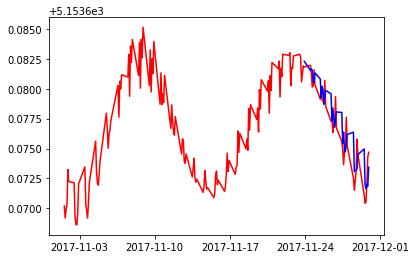


Mean Square error"  6.992601855100632e-07


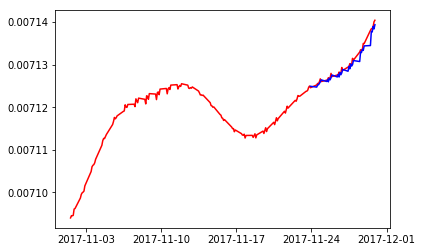


Mean Square error"  2.3710932590792487e-06


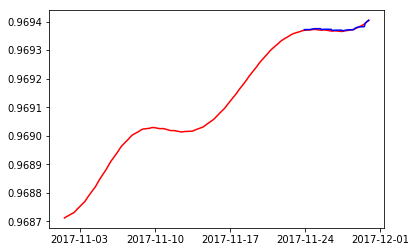


Mean Square error"  9.376760915971449e-05


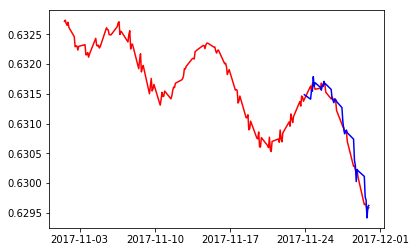


Mean Square error"  0.003976079762123772


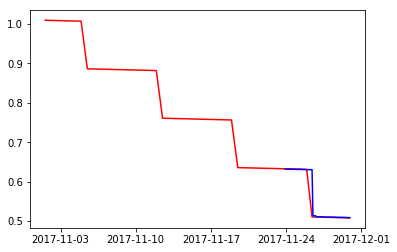


Mean Square error"  7.896366158489765e-11


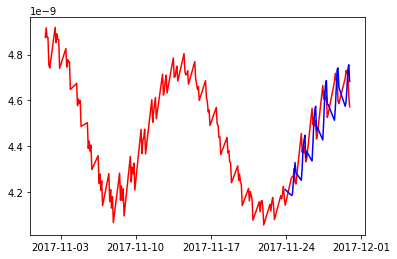


Mean Square error"  0.7699641479312087


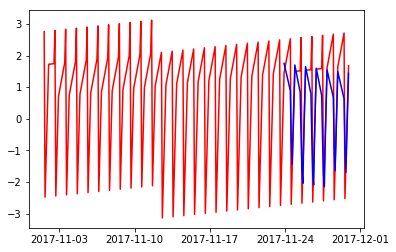

In [38]:
from sklearn.linear_model import LinearRegression
for j in range(0,7):
    s = df1.iloc[:,j]
    df3 = pd.DataFrame()

    for i in range(1, 6):
        df3["lag_{}".format(i)] = df1.iloc[:,j].shift(i)
    
    train = df3.iloc[0:137]
    test = df3.iloc[137:177]
    
    train=train.dropna(how="any")
    
    m = df1.iloc[:,j]
    ytrain=m.iloc[5:137]
    ytest =m.iloc[137:]

    xgb = LinearRegression()
    xgb.fit(train, ytrain)
    
    preds = xgb.predict(test)
   
    print('\nMean Square error" ', mean_absolute_error(ytest,preds))
    
    pred = pd.DataFrame(data=preds, index=ytest.index)
    
    plt.plot(df1.index,df1.iloc[:,j],color="red")
    #plt.plot(ytrain.index,ytrain,color="green")
    plt.plot(pred,color="blue")
    plt.show()

In [2]:
#linear for sqrt_A
df3 = pd.DataFrame()

for i in range(1, 6):
    df3["lag_{}".format(i)] = df1.sqrt_A.shift(i)
    
train = df3.iloc[0:137]
test = df3.iloc[137:177]
    
train=train.dropna(how="any")

m = df1['sqrt_A']
ytrain=m.iloc[5:137]
ytest =m.iloc[137:]

xgb = LinearRegression()
xgb.fit(train, ytrain)


    
preds = xgb.predict(test)

print('\nMean Square error" ', mean_absolute_error(ytest,preds))

NameError: name 'df1' is not defined

In [40]:
ytest

Epoch_Time_of_Clock
2017-11-23 22:00:00    5153.681822
2017-11-24 12:00:00    5153.681953
2017-11-24 14:00:00    5153.681229
2017-11-24 16:00:00    5153.680145
2017-11-24 18:00:00    5153.680220
2017-11-24 19:59:44    5153.681574
2017-11-24 22:00:00    5153.680344
2017-11-25 10:00:00    5153.679129
2017-11-25 12:00:00    5153.680117
2017-11-25 14:00:00    5153.679018
2017-11-25 16:00:00    5153.678968
2017-11-25 18:00:00    5153.678715
2017-11-25 19:59:44    5153.680696
2017-11-25 22:00:00    5153.678534
2017-11-26 10:00:00    5153.677269
2017-11-26 12:00:00    5153.677622
2017-11-26 14:00:00    5153.676332
2017-11-26 16:00:00    5153.677090
2017-11-26 18:00:00    5153.676861
2017-11-26 19:59:44    5153.679340
2017-11-26 22:00:00    5153.676722
2017-11-27 10:00:00    5153.675585
2017-11-27 12:00:00    5153.674902
2017-11-27 14:00:00    5153.673655
2017-11-27 16:00:00    5153.674738
2017-11-27 18:00:00    5153.674879
2017-11-27 19:59:44    5153.677614
2017-11-27 22:00:00    5153.675253


In [41]:
xgb.coef_

array([ 0.54375126,  0.40334444, -0.32512749,  0.36538608, -0.02109739])

In [42]:
xgb.intercept_

173.90118090357555


Mean Square error"  0.00284007865905096


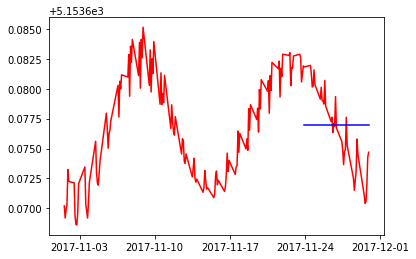


Mean Square error"  1.2530358049401809e-05


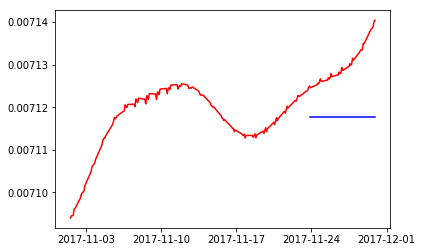


Mean Square error"  0.00031128658130133435


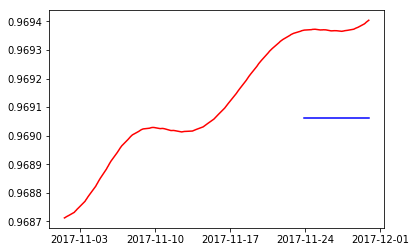


Mean Square error"  0.000828985453070441


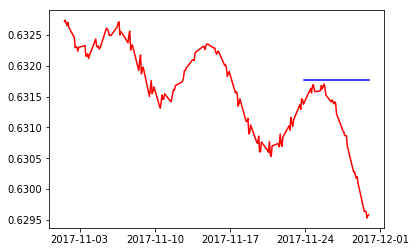


Mean Square error"  0.25484209086797655


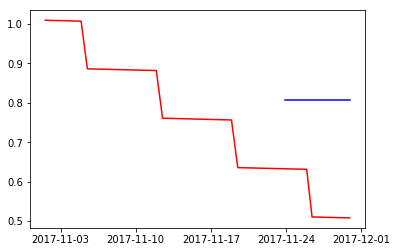


Mean Square error"  1.523261501900226e-10


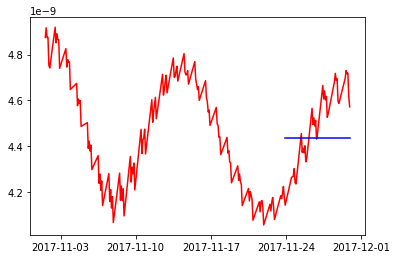


Mean Square error"  0.9989549807835371


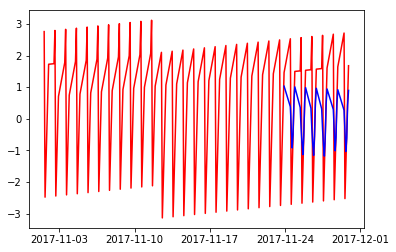

In [43]:
#lasso 
from sklearn import linear_model 

for j in range(0,7):
    s = df1.iloc[:,j]
    df3 = pd.DataFrame()

    for i in range(1, 6):
        df3["lag_{}".format(i)] = df1.iloc[:,j].shift(i)
    
    train = df3.iloc[0:137]
    test = df3.iloc[137:177]
    
    train=train.dropna(how="any")
    
    m = df1.iloc[:,j]
    ytrain=m.iloc[5:137]
    ytest =m.iloc[137:]

    xgb = linear_model.Lasso(alpha=0.5)
    xgb.fit(train, ytrain)
    
    preds = xgb.predict(test)
   
    print('\nMean Square error" ', mean_absolute_error(ytest,preds))
    
    pred = pd.DataFrame(data=preds, index=ytest.index)
    
    plt.plot(df1.index,df1.iloc[:,j],color="red")
    #plt.plot(ytrain.index,ytrain,color="green")
    plt.plot(pred,color="blue")
    plt.show()


Mean Square error"  0.002712276803276836


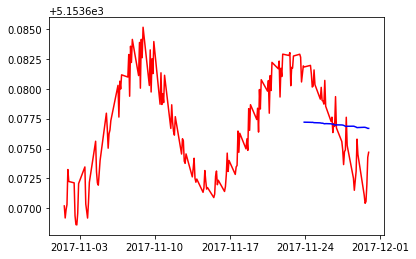


Mean Square error"  1.2530356249418881e-05


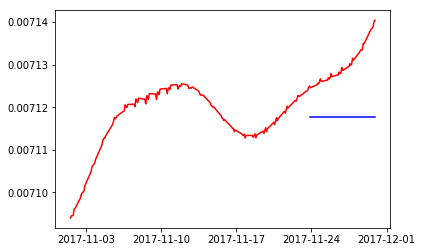


Mean Square error"  0.0003112542090478565


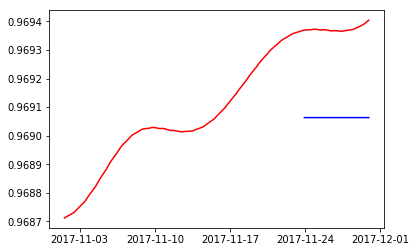


Mean Square error"  0.0008281166832493858


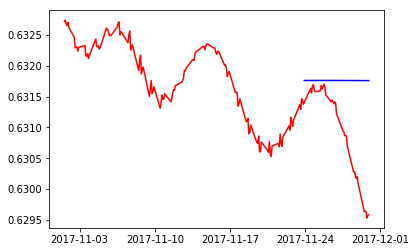


Mean Square error"  0.010060660408788651


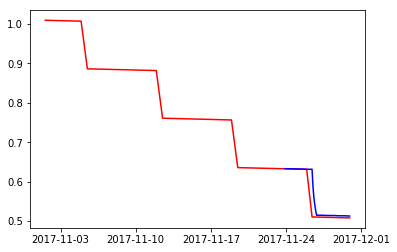


Mean Square error"  1.523261501900226e-10


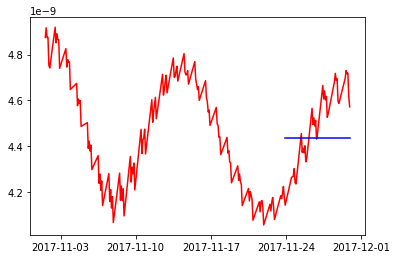


Mean Square error"  0.7700993560587467


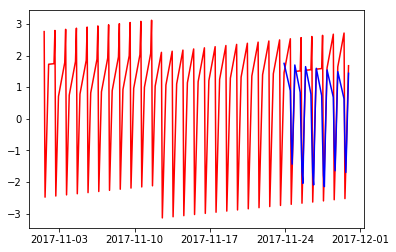

In [44]:
#ridge
from sklearn.linear_model import Ridge

for j in range(0,7):
    s = df1.iloc[:,j]
    df3 = pd.DataFrame()

    for i in range(1, 6):
        df3["lag_{}".format(i)] = df1.iloc[:,j].shift(i)
    
    train = df3.iloc[0:137]
    test = df3.iloc[137:177]
    
    train=train.dropna(how="any")
    
    m = df1.iloc[:,j]
    ytrain=m.iloc[5:137]
    ytest =m.iloc[137:]

    xgb = Ridge(alpha=0.2)
    xgb.fit(train, ytrain)
    
    preds = xgb.predict(test)
   
    print('\nMean Square error" ', mean_absolute_error(ytest,preds))
    
    pred = pd.DataFrame(data=preds, index=ytest.index)
    
    plt.plot(df1.index,df1.iloc[:,j],color="red")
    #plt.plot(ytrain.index,ytrain,color="green")
    plt.plot(pred,color="blue")
    plt.show()


Mean Square error"  0.00284007865905096


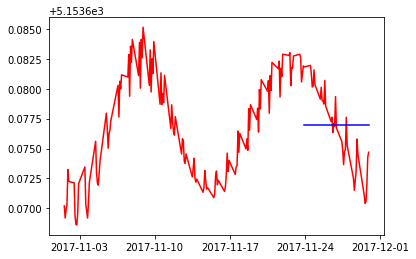


Mean Square error"  1.2530358049401809e-05


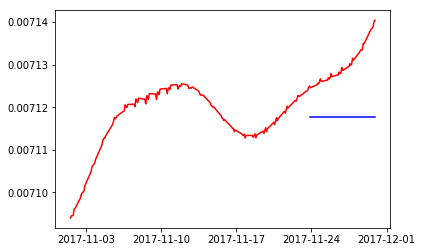


Mean Square error"  0.00031128658130133435


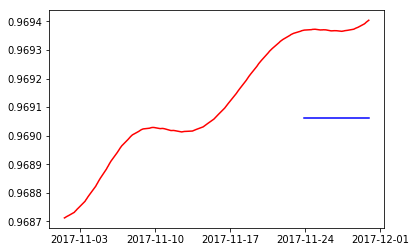


Mean Square error"  0.000828985453070441


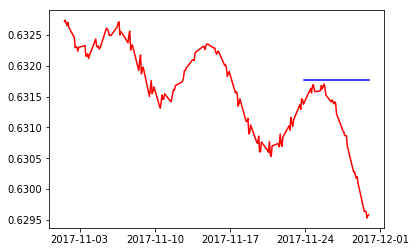


Mean Square error"  0.25484209086797655


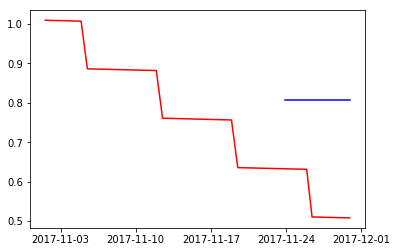


Mean Square error"  1.523261501900226e-10


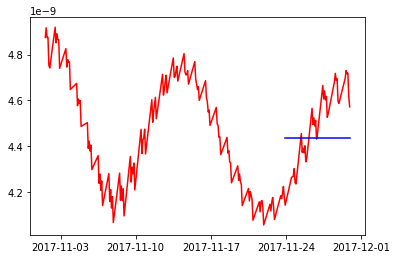


Mean Square error"  1.0553102063020863


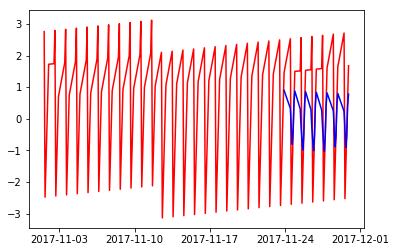

In [45]:
#ElasticNet
from sklearn.linear_model import ElasticNet

for j in range(0,7):
    s = df1.iloc[:,j]
    df3 = pd.DataFrame()

    for i in range(1, 6):
        df3["lag_{}".format(i)] = df1.iloc[:,j].shift(i)
    
    train = df3.iloc[0:137]
    test = df3.iloc[137:177]
    
    train=train.dropna(how="any")
    
    m = df1.iloc[:,j]
    ytrain=m.iloc[5:137]
    ytest =m.iloc[137:]

    xgb = ElasticNet(random_state=0)
    xgb.fit(train, ytrain)
    
    preds = xgb.predict(test)
   
    print('\nMean Square error" ', mean_absolute_error(ytest,preds))
    
    pred = pd.DataFrame(data=preds, index=ytest.index)
    
    plt.plot(df1.index,df1.iloc[:,j],color="red")
    #plt.plot(ytrain.index,ytrain,color="green")
    plt.plot(pred,color="blue")
    plt.show()


Mean Square error"  0.0016274960512873804


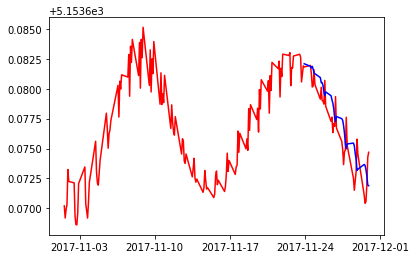


Mean Square error"  1.6907481407410063e-06


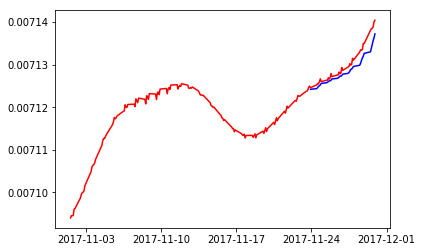


Mean Square error"  4.691627641270069e-05


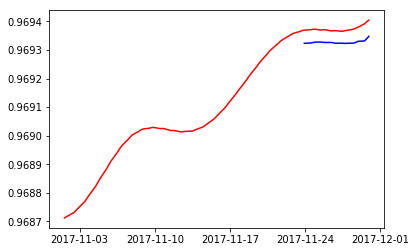


Mean Square error"  0.00018984536352769087


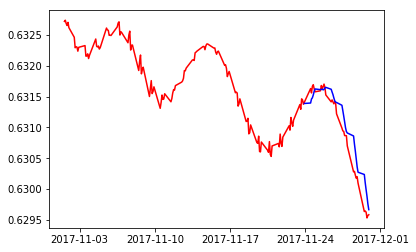


Mean Square error"  0.004225322724441552


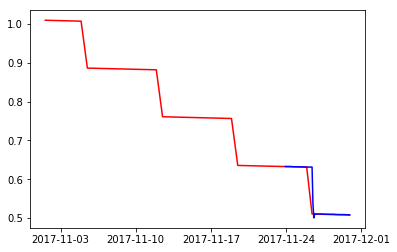


Mean Square error"  1.5679540721548485e-10


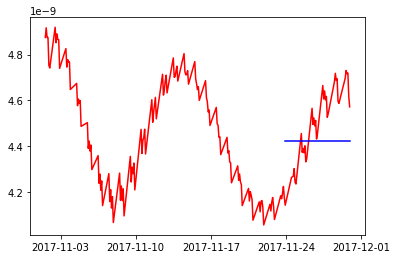


Mean Square error"  0.7875743711261312


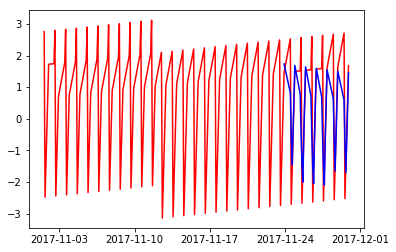

In [46]:
#HuberRegressor
from sklearn.linear_model import HuberRegressor

for j in range(0,7):
    s = df1.iloc[:,j]
    df3 = pd.DataFrame()

    for i in range(1, 6):
        df3["lag_{}".format(i)] = df1.iloc[:,j].shift(i)
    
    train = df3.iloc[0:137]
    test = df3.iloc[137:177]
    
    train=train.dropna(how="any")
    
    m = df1.iloc[:,j]
    ytrain=m.iloc[5:137]
    ytest =m.iloc[137:]

    xgb = HuberRegressor()
    xgb.fit(train, ytrain)
    
    preds = xgb.predict(test)
   
    print('\nMean Square error" ', mean_absolute_error(ytest,preds))
    
    pred = pd.DataFrame(data=preds, index=ytest.index)
    
    plt.plot(df1.index,df1.iloc[:,j],color="red")
    #plt.plot(ytrain.index,ytrain,color="green")
    plt.plot(pred,color="blue")
    plt.show()


Mean Square error"  0.0012211947382184008


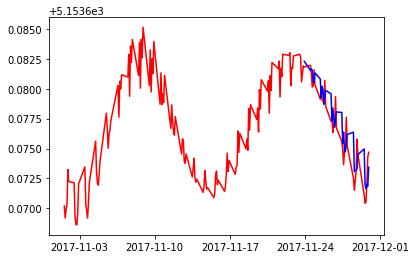


Mean Square error"  2.0829032021987046e-06


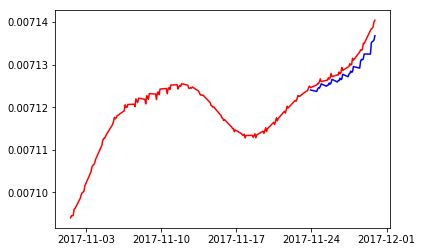


Mean Square error"  3.274061180572052e-06


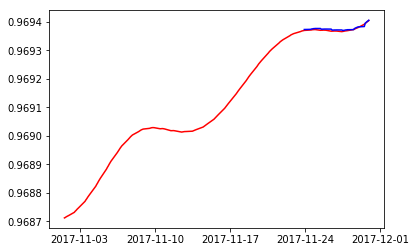


Mean Square error"  9.391361801967257e-05


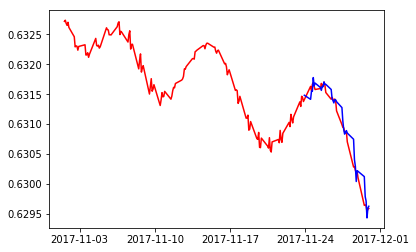


Mean Square error"  0.003976085201254748


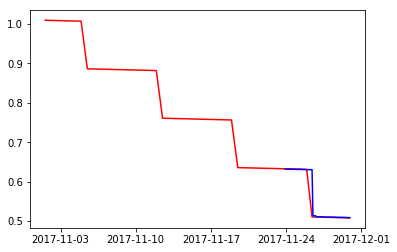


Mean Square error"  1.523261501900226e-10


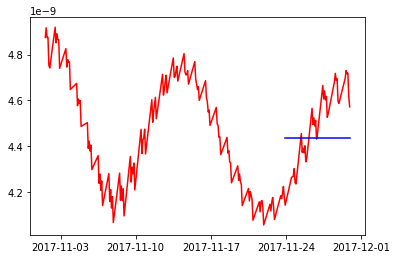


Mean Square error"  0.7699641479312088


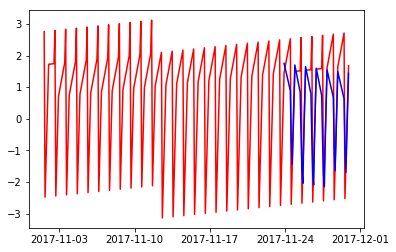

In [47]:
#Lars
from sklearn.linear_model import Lars

for j in range(0,7):
    s = df1.iloc[:,j]
    df3 = pd.DataFrame()

    for i in range(1, 6):
        df3["lag_{}".format(i)] = df1.iloc[:,j].shift(i)
    
    train = df3.iloc[0:137]
    test = df3.iloc[137:177]
    
    train=train.dropna(how="any")
    
    m = df1.iloc[:,j]
    ytrain=m.iloc[5:137]
    ytest =m.iloc[137:]

    xgb = Lars()
    xgb.fit(train, ytrain)
    
    preds = xgb.predict(test)
   
    print('\nMean Square error" ', mean_absolute_error(ytest,preds))
    
    pred = pd.DataFrame(data=preds, index=ytest.index)
    
    plt.plot(df1.index,df1.iloc[:,j],color="red")
    #plt.plot(ytrain.index,ytrain,color="green")
    plt.plot(pred,color="blue")
    plt.show()


Mean Square error"  0.00284007865905096


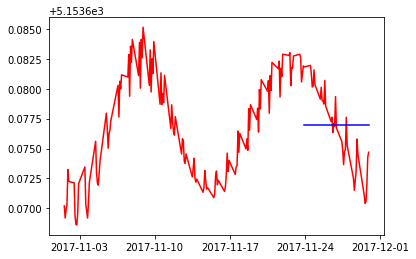


Mean Square error"  1.2530358049401809e-05


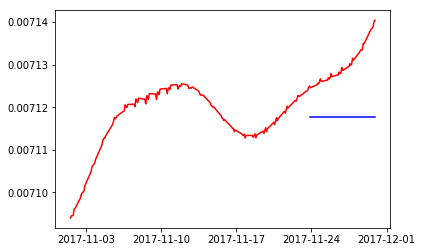


Mean Square error"  0.00031128658130133435


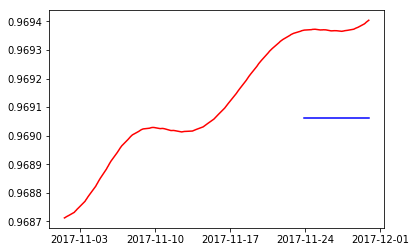


Mean Square error"  0.000828985453070441


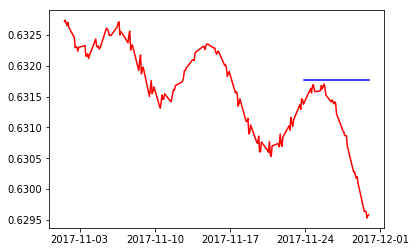


Mean Square error"  0.2418647844927017


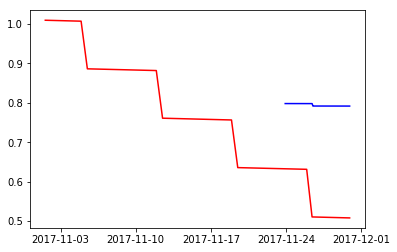


Mean Square error"  1.523261501900226e-10


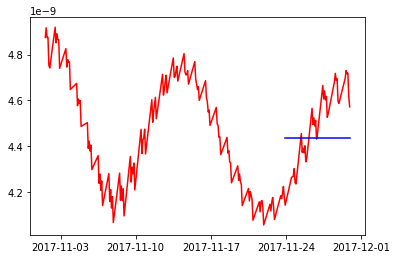


Mean Square error"  0.8271628586211598


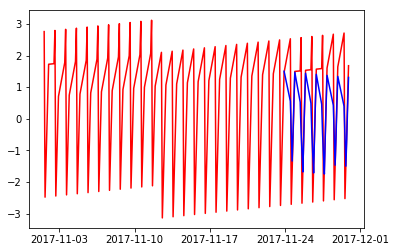

In [48]:
#LassoLars
from sklearn.linear_model import LassoLars

for j in range(0,7):
    s = df1.iloc[:,j]
    df3 = pd.DataFrame()

    for i in range(1, 6):
        df3["lag_{}".format(i)] = df1.iloc[:,j].shift(i)
    
    train = df3.iloc[0:137]
    test = df3.iloc[137:177]
    
    train=train.dropna(how="any")
    
    m = df1.iloc[:,j]
    ytrain=m.iloc[5:137]
    ytest =m.iloc[137:]

    xgb = LassoLars(alpha=0.01)
    xgb.fit(train, ytrain)
    
    preds = xgb.predict(test)
   
    print('\nMean Square error" ', mean_absolute_error(ytest,preds))
    
    pred = pd.DataFrame(data=preds, index=ytest.index)
    
    plt.plot(df1.index,df1.iloc[:,j],color="red")
    #plt.plot(ytrain.index,ytrain,color="green")
    plt.plot(pred,color="blue")
    plt.show()


Mean Square error"  0.09413897883730442


/home/shreyas/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.passive_aggressive.PassiveAggressiveRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


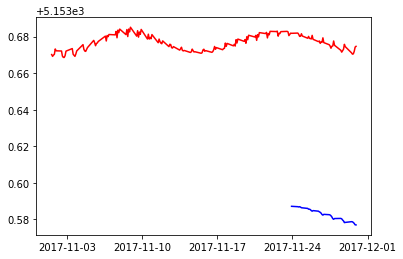


Mean Square error"  0.007130346127086751


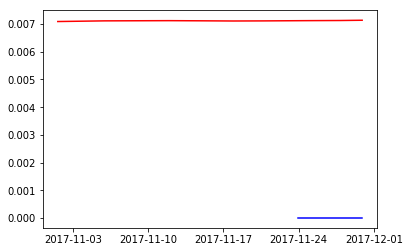


Mean Square error"  0.08506897156489872


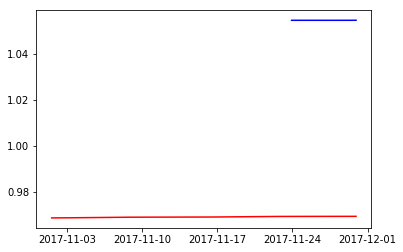


Mean Square error"  0.06693947372141998


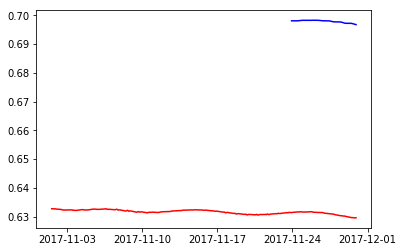


Mean Square error"  0.03370488757559709


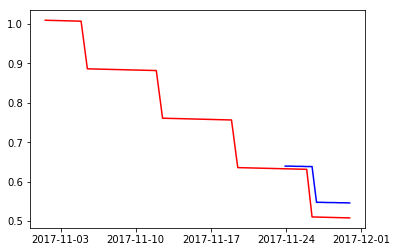


Mean Square error"  4.502053600032e-09


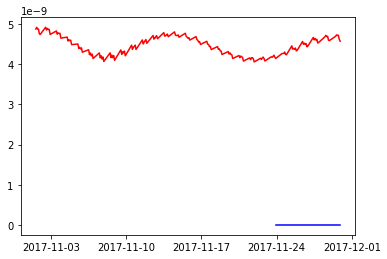


Mean Square error"  2.236911014584333


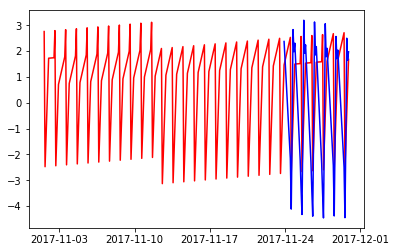

In [49]:
#PassiveAgressiveRegressor
from sklearn.linear_model import PassiveAggressiveRegressor

for j in range(0,7):
    s = df1.iloc[:,j]
    df3 = pd.DataFrame()

    for i in range(1, 6):
        df3["lag_{}".format(i)] = df1.iloc[:,j].shift(i)
    
    train = df3.iloc[0:137]
    test = df3.iloc[137:177]
    
    train=train.dropna(how="any")
    
    m = df1.iloc[:,j]
    ytrain=m.iloc[5:137]
    ytest =m.iloc[137:]

    xgb = PassiveAggressiveRegressor()
    xgb.fit(train, ytrain)
    
    preds = xgb.predict(test)
   
    print('\nMean Square error" ', mean_absolute_error(ytest,preds))
    
    pred = pd.DataFrame(data=preds, index=ytest.index)
    
    plt.plot(df1.index,df1.iloc[:,j],color="red")
    #plt.plot(ytrain.index,ytrain,color="green")
    plt.plot(pred,color="blue")
    plt.show()


Mean Square error"  1.2049016252118302e+17


/home/shreyas/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


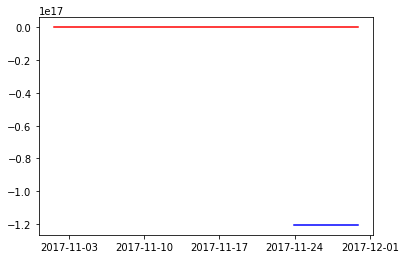


Mean Square error"  0.0012718898502068429


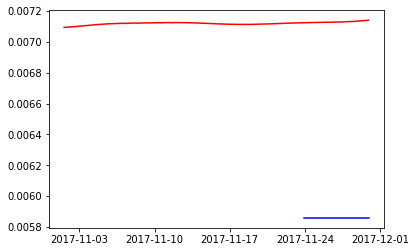


Mean Square error"  0.00010603178294950055


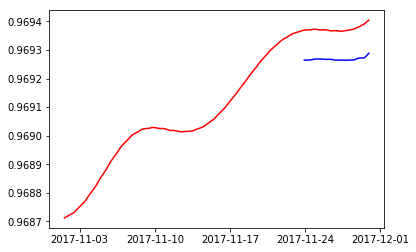


Mean Square error"  0.003140685388468256


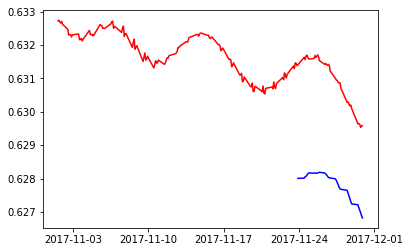


Mean Square error"  0.061078996122076054


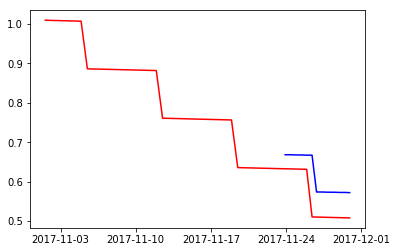


Mean Square error"  8.486008953615452e-10


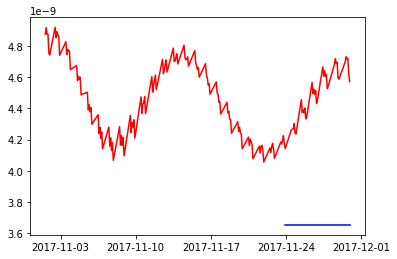


Mean Square error"  0.7947003998347666


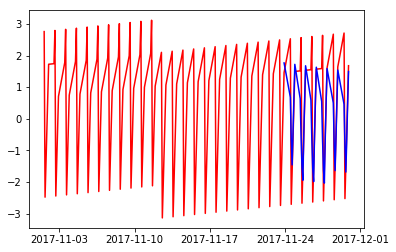

In [50]:
#SGDRegressor
from sklearn.linear_model import SGDRegressor

for j in range(0,7):
    s = df1.iloc[:,j]
    df3 = pd.DataFrame()

    for i in range(1, 6):
        df3["lag_{}".format(i)] = df1.iloc[:,j].shift(i)
    
    train = df3.iloc[0:137]
    test = df3.iloc[137:177]
    
    train=train.dropna(how="any")
    
    m = df1.iloc[:,j]
    ytrain=m.iloc[5:137]
    ytest =m.iloc[137:]

    xgb = SGDRegressor()
    xgb.fit(train, ytrain)
    
    preds = xgb.predict(test)
   
    print('\nMean Square error" ', mean_absolute_error(ytest,preds))
    
    pred = pd.DataFrame(data=preds, index=ytest.index)
    
    plt.plot(df1.index,df1.iloc[:,j],color="red")
    #plt.plot(ytrain.index,ytrain,color="green")
    plt.plot(pred,color="blue")
    plt.show()


Mean Square error"  0.0013114340098127285


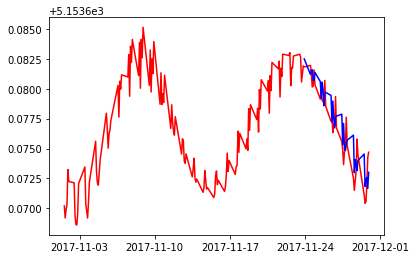


Mean Square error"  6.095505993037199e-07


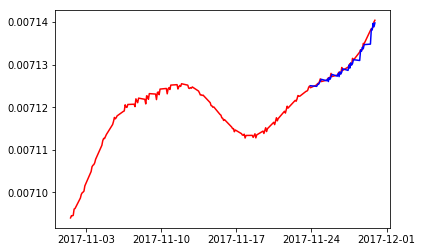


Mean Square error"  2.371093258973778e-06


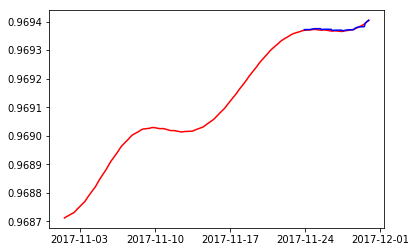


Mean Square error"  9.206253850095047e-05


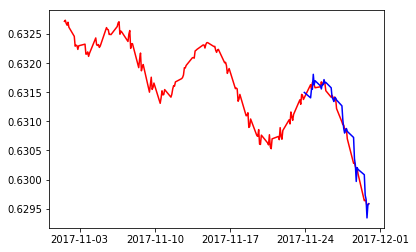


Mean Square error"  0.08290991641362311


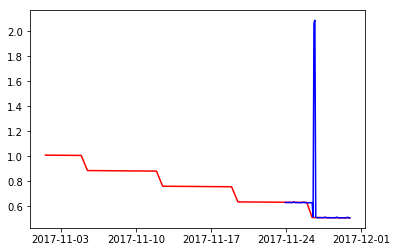


Mean Square error"  8.275910021553675e-11


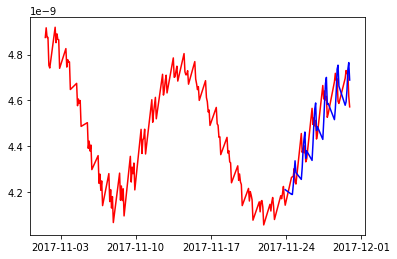


Mean Square error"  1.4597609781921133


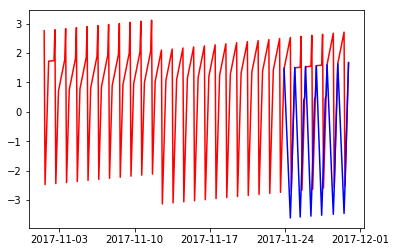

In [51]:
#RANSACRegressor
from sklearn.linear_model import RANSACRegressor

for j in range(0,7):
    s = df1.iloc[:,j]
    df3 = pd.DataFrame()

    for i in range(1, 6):
        df3["lag_{}".format(i)] = df1.iloc[:,j].shift(i)
    
    train = df3.iloc[0:137]
    test = df3.iloc[137:177]
    
    train=train.dropna(how="any")
    
    m = df1.iloc[:,j]
    ytrain=m.iloc[5:137]
    ytest =m.iloc[137:]

    xgb = RANSACRegressor()
    xgb.fit(train, ytrain)
    
    preds = xgb.predict(test)
   
    print('\nMean Square error" ', mean_absolute_error(ytest,preds))
    
    pred = pd.DataFrame(data=preds, index=ytest.index)
    
    plt.plot(df1.index,df1.iloc[:,j],color="red")
    #plt.plot(ytrain.index,ytrain,color="green")
    plt.plot(pred,color="blue")
    plt.show()


Mean Square error"  0.002836895249970439


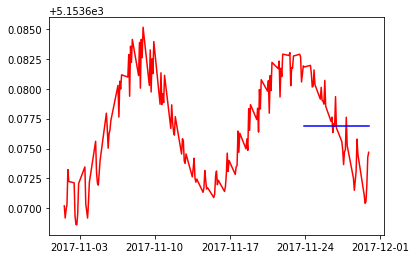


Mean Square error"  1.9478186731754786e-05


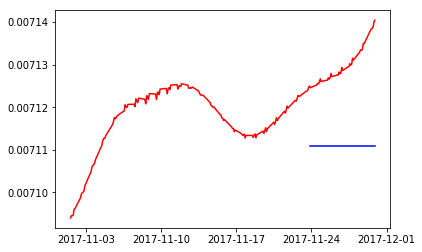


Mean Square error"  0.0003295101186500393


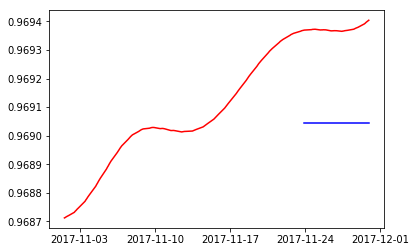


Mean Square error"  0.0007054911463750035


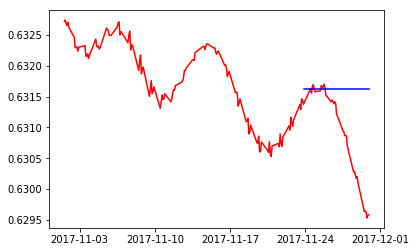


Mean Square error"  0.09497139785352582


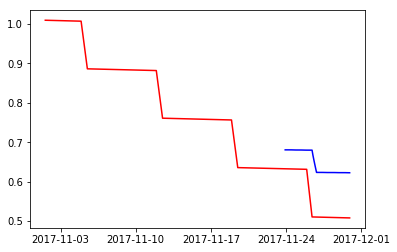


Mean Square error"  1.4062192864831245e-10


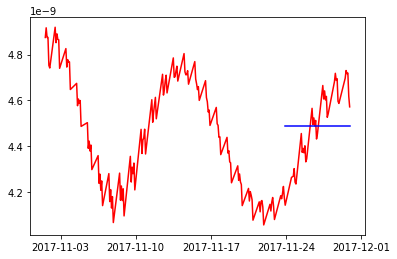


Mean Square error"  0.5354451043143413


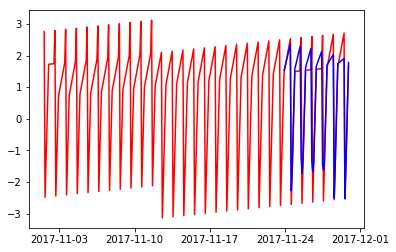

In [52]:
#SVR
from sklearn import svm

for j in range(0,7):
    s = df1.iloc[:,j]
    df3 = pd.DataFrame()

    for i in range(1, 6):
        df3["lag_{}".format(i)] = df1.iloc[:,j].shift(i)
    
    train = df3.iloc[0:137]
    test = df3.iloc[137:177]
    
    train=train.dropna(how="any")
    
    m = df1.iloc[:,j]
    ytrain=m.iloc[5:137]
    ytest =m.iloc[137:]

    xgb = svm.SVR()
    xgb.fit(train, ytrain)
    
    preds = xgb.predict(test)
   
    print('\nMean Square error" ', mean_absolute_error(ytest,preds))
    
    pred = pd.DataFrame(data=preds, index=ytest.index)
    
    plt.plot(df1.index,df1.iloc[:,j],color="red")
    #plt.plot(ytrain.index,ytrain,color="green")
    plt.plot(pred,color="blue")
    plt.show()